## Baton Rouge Louisiana Traffic Incidents - Legacy
Traffic incident reports handled by Baton Rouge City Police. 2010 - 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
import datetime as datetime
import dateutil as parser
import dython.nominal as association 


# Import the dataset

In [2]:
df = pd.read_csv("Legacy_Baton_Rouge_Traffic_Incidents.csv")
df.head(3)

,FILE#,CRASH DATE,CRASH TIME,TOT VEH,DISTRICT,ZONE,SUBZONE,STREET#,STREET DIRECTION,STREET NAME,...,ROAD TYPE,ALIGNMENT,PRIMARY FACTOR,SECOND FACTOR,WEATHER,LOCATION KIND,RELATION ROADWAY,ACCESS CONTROL,LIGHTING,GEOLOCATION
0,17-00010877,08/04/2017,07:36 AM,2,1,A,1,500.0,NaN,I110,...,ONE-WAY ROAD,STRAIGHT-LEVEL,CONDITION OF DRIVER,NaN,CLEAR,OTHER,ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DAYLIGHT,"500 I110\nBATON ROUGE, LA"
1,17-00011507,08/16/2017,04:59 PM,2,2,B,2,800.0,W,I10,...,OTHER,STRAIGHT-LEVEL,VIOLATIONS,NaN,CLEAR,OTHER,ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DAYLIGHT,"800 W I10 HW\nBATON ROUGE, LA"
2,17-00005091,03/31/2017,10:51 AM,1,2,B,5,NaN,NaN,PERKINS,...,OTHER,STRAIGHT-LEVEL,VIOLATIONS,NaN,CLEAR,OTHER,OTHER,OTHER,DAYLIGHT,"PERKINS\nBATON ROUGE, LA"


In [3]:
print(df.shape)
print()
print(df.info())

(177119, 34)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177119 entries, 0 to 177118
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FILE#                177119 non-null  object 
 1   CRASH DATE           177119 non-null  object 
 2   CRASH TIME           177119 non-null  object 
 3   TOT VEH              177119 non-null  int64  
 4   DISTRICT             177101 non-null  object 
 5   ZONE                 175299 non-null  object 
 6   SUBZONE              174207 non-null  object 
 7   STREET#              175072 non-null  float64
 8   STREET DIRECTION     50299 non-null   object 
 9   STREET NAME          177119 non-null  object 
 10  STREET TYPE          142014 non-null  object 
 11  FORMATTED STREET     177119 non-null  object 
 12  OCCURED ON           177119 non-null  object 
 13  HIT&RUN              32937 non-null   object 
 14  TRAIN INVOLVED       74 non-null      object 
 15  FAT

# Lets convert the dates which are in object to datetime

## I would like to convert the column name to lower case, just for convinience

In [4]:
columns = df.columns
lower =[]
for col in columns:
    lower.append(col.lower())
print(lower)

['file#', 'crash date', 'crash time', 'tot veh', 'district', 'zone', 'subzone', 'street#', 'street direction', 'street name', 'street type', 'formatted street', 'occured on', 'hit&run', 'train involved', 'fatality', 'injury', 'pedestrian', 'at intersection', 'closest street', 'manner of collision', 'surface condition', 'surface type', 'road condition', 'road type', 'alignment', 'primary factor', 'second factor', 'weather', 'location kind', 'relation roadway', 'access control', 'lighting', 'geolocation']


In [5]:
# Assigning the new columns of lower case letters
df.columns = lower
df.head(3)

,file#,crash date,crash time,tot veh,district,zone,subzone,street#,street direction,street name,...,road type,alignment,primary factor,second factor,weather,location kind,relation roadway,access control,lighting,geolocation
0,17-00010877,08/04/2017,07:36 AM,2,1,A,1,500.0,NaN,I110,...,ONE-WAY ROAD,STRAIGHT-LEVEL,CONDITION OF DRIVER,NaN,CLEAR,OTHER,ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DAYLIGHT,"500 I110\nBATON ROUGE, LA"
1,17-00011507,08/16/2017,04:59 PM,2,2,B,2,800.0,W,I10,...,OTHER,STRAIGHT-LEVEL,VIOLATIONS,NaN,CLEAR,OTHER,ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DAYLIGHT,"800 W I10 HW\nBATON ROUGE, LA"
2,17-00005091,03/31/2017,10:51 AM,1,2,B,5,NaN,NaN,PERKINS,...,OTHER,STRAIGHT-LEVEL,VIOLATIONS,NaN,CLEAR,OTHER,OTHER,OTHER,DAYLIGHT,"PERKINS\nBATON ROUGE, LA"


# Conduct some exploratory data analysis

## check NA values

In [6]:
df.isna().sum()

file#                       0
crash date                  0
crash time                  0
tot veh                     0
district                   18
zone                     1820
subzone                  2912
street#                  2047
street direction       126820
street name                 0
street type             35105
formatted street            0
occured on                  0
hit&run                144182
train involved         177045
fatality               176833
injury                 160052
pedestrian             176078
at intersection        110789
closest street          11236
manner of collision       217
surface condition           0
surface type                0
road condition              0
road type                   0
alignment                   0
primary factor              0
second factor          110003
weather                     0
location kind               0
relation roadway            0
access control              0
lighting                    0
geolocatio

df.dropna(how = 'any', axis =1)
# reassign to df
df =df.dropna(how = 'any', axis =1)
df.shape

In [7]:
df.columns

Index(['file#', 'crash date', 'crash time', 'tot veh', 'district', 'zone',
       'subzone', 'street#', 'street direction', 'street name', 'street type',
       'formatted street', 'occured on', 'hit&run', 'train involved',
       'fatality', 'injury', 'pedestrian', 'at intersection', 'closest street',
       'manner of collision', 'surface condition', 'surface type',
       'road condition', 'road type', 'alignment', 'primary factor',
       'second factor', 'weather', 'location kind', 'relation roadway',
       'access control', 'lighting', 'geolocation'],
      dtype='object')

# Lets examine the incidents and weather

<AxesSubplot:xlabel='weather', ylabel='index'>

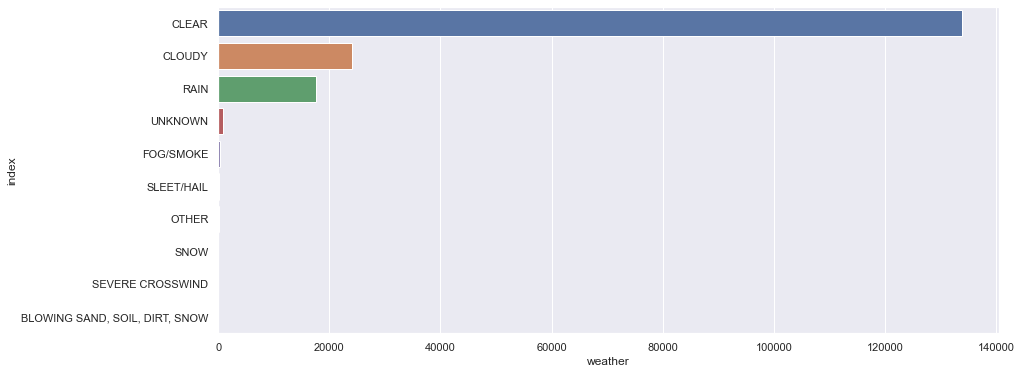

In [8]:
df_w = df["weather"].value_counts().reset_index()
fig,ax =plt.subplots(figsize = (14,6))
sns.barplot(data = df_w, y ='index',x="weather")

# Year with most registered crash

In [9]:
df["crash date"] = pd.to_datetime(df["crash date"])
df["crash time"] = pd.to_datetime(df["crash time"])

[Text(0.5, 0, 'year'), Text(0, 0.5, 'count ')]

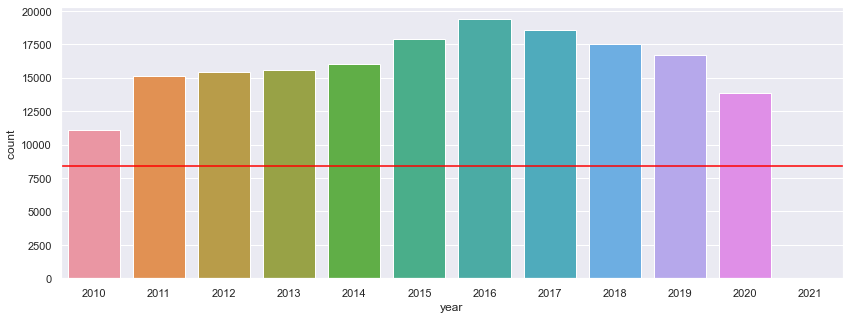

In [10]:
df_d = df["crash date"].dt.year.value_counts().reset_index()
fig,ax =plt.subplots(figsize = (14,5))
sns.barplot(data = df_d, x = 'index', y = "crash date")
ax.axhline(df_d.values.mean(), color='red', linestyle='-')
ax.set(xlabel ="year", ylabel= "count ")

In [11]:
df_d

,index,crash date
0,2016,19358
1,2017,18532
2,2015,17900
3,2018,17527
4,2019,16674
5,2014,16059
6,2013,15590
7,2012,15428
8,2011,15148
9,2020,13838


# How many are caused by lightening conditions

In [12]:
df_l = df.lighting.value_counts().reset_index()
df_l

,index,lighting
0,DAYLIGHT,133346
1,DARK - CONTINUOUS STREET,32438
2,DARK - STREET LIGHT AT INTERSECTION ONLY,4005
3,DARK - NO STREET,2636
4,DUSK,1641
5,UNKNOWN,1614
6,DAWN,745
7,OTHER,694


[Text(0.5, 0, 'year'), Text(0, 0.5, 'count ')]

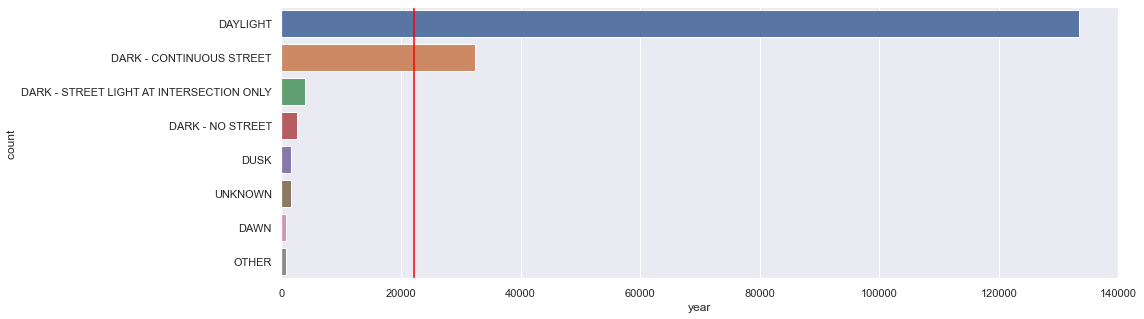

In [13]:
fig,ax =plt.subplots(figsize = (15,5))
ax.axvline(df_l.lighting.mean(), color='red', linestyle='-')
sns.barplot(data = df_l, x=  df_l["lighting"], y= df_l["index"])
ax.set(xlabel ="year", ylabel= "count ")

# How many often is crash recorded daily ?